# Week 5 - Decision Trees and Linear Regression

## Exercises

In [7]:
from matplotlib.pyplot import *
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from sklearn import tree
from pylab import *
import sklearn.linear_model as lm
import pandas as pd
import pydotplus
from IPython.display import Image  
from sklearn.model_selection import train_test_split

In [8]:
# 5.1.1
# Names of data objects
dataobjectNames = [
    'Human', 'Python','Salmon','Whale','Frog','Komodo dragon',
    'Bat','Pigeon','Cat','Leopard shark','Turtle','Penguin',
    'Porcupine','Eel','Salamander',]

# Attribute names
attributeNames = [
    'Body temperature','Skin cover','Gives birth',
    'Aquatic creature','Aerial creature','Has legs','Hibernates']

# Attribute values
X = np.mat('''
    1 1 1 0 0 1 0;
    0 2 0 0 0 0 1;
    0 2 0 1 0 0 0;
    1 1 1 1 0 0 0;
    0 0 0 2 0 1 1;
    0 2 0 0 0 1 0;
    1 1 1 0 1 1 1;
    1 3 0 0 1 1 0;
    1 4 1 0 0 1 0;
    0 2 1 1 0 0 0;
    0 2 0 2 0 1 0;
    1 3 0 2 0 1 0;
    1 5 1 0 0 1 1;
    0 2 0 1 0 0 0;
    0 0 0 2 0 1 1 ''')

# Class indices
# For the categorical data
y = np.mat('3 4 2 3 0 4 3 1 3 2 4 1 3 2 0').T

# Class names
classNames = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']
    
# Number data objects, attributes, and classes
N, M = X.shape
C = len(classNames)

In [9]:
# 5.1.2 + 5.1.3 in for-loop
X = np.asarray(X)
y = np.asarray(y).ravel()

# Entropy and deviance is a measure for the same thing
# Gini and gdi the same
split_crit = ['gini','entropy']

for crit in split_crit:
    # Fit regression tree classifier, Gini split criterion, no pruning
    dtc = tree.DecisionTreeClassifier(criterion=crit, min_samples_split=2)
    dtc = dtc.fit(X,y)

    # Export tree graph for visualization purposes:
    # (note: you can use i.e. Graphviz application to visualize the file)
    filename = "tree_"+str(crit)+".gvz"
    out = tree.export_graphviz(dtc, out_file=filename, feature_names=attributeNames)

In [10]:
# 5.1.4
# Define a new data object (a dragon) with the attributes given in the text
x = (np.array([0, 2, 1, 2, 1, 1, 1])).reshape(1,-1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print '\nNew object attributes:'
print dict(zip(attributeNames,x))
print '\nClassification result:'
print classNames[x_class]


New object attributes:
{'Body temperature': array([0, 2, 1, 2, 1, 1, 1])}

Classification result:
Reptile


In [11]:
# 5.1.5
# Load Matlab data file and extract variables of interest
mat_data = loadmat('Data/wine.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
C = mat_data['C'][0,0]
M = mat_data['M'][0,0]
N = mat_data['N'][0,0]
#attributeNames = [name[0] for name in mat_data['attributeNames'][0]
#classNames = [name[0][0] for name in mat_data['classNames'][0]]

attributeNames = [i[0][0] for i in mat_data['attributeNames']]
classNames = [j[0] for i in mat_data['classNames'] for j in i]


# Remove outliers
outlier_mask = (X[:,1]>20).A.ravel() | (X[:,7]>10).A.ravel() | (X[:,10]>200).A.ravel()
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask,:]
y = y[valid_mask,:]
# Remove attribute 12 (Quality score)
X = X[:,0:11]
attributeNames = attributeNames[0:11]
# Update N and M, shape: 6304 x 11
N, M = X.shape


In [12]:
# 5.1.6
# Fit regression tree classifier, Gini split criterion, pruning enabled
dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=100)
dtc = dtc.fit(X,y)

# Export tree graph for visualization purposes:
# (note: you can use i.e. Graphviz application to visualize the file)
out = tree.export_graphviz(dtc, out_file='tree_gini_Wine_data.gvz', feature_names=attributeNames)

#### Explain what happens when you change the values of the parameter ``min_samples_split``
When you are changing the ``min_samples_split``, you change the number of decisions that is taken by the model.

In [13]:
# 5.1.7
# Define a new data object (new type of wine) with the attributes given in the text
x = (np.array([6.9, 1.09, .06, 2.1, .0061, 12, 31, .99, 3.5, .44, 12])).reshape(1,-1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print '\nNew object attributes:'
for attr in attributeNames:
    print attr[0]
print '\nClassification result:'
print classNames[x_class]


New object attributes:
F
V
C
R
C
F
T
D
p
S
A

Classification result:
White


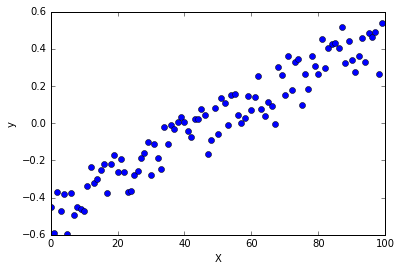

In [14]:
# 5.2.1
# Number of data objects
N = 100

# Attribute values
X = np.mat(range(N)).T

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.mat(eps_std*np.random.randn(N) + eps_mean).T

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1*X + eps

# Make a scatter plot
figure()
plot(X.A,y.A,'o')
xlabel('X'); ylabel('y')

show()

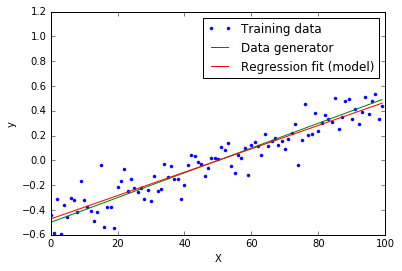

In [15]:
# 5.2.2 
# Use dataset as in the previous exercise
N = 100
X = np.mat(range(N)).T
eps_mean, eps_std = 0, 0.1
eps = np.mat(eps_std*np.random.randn(N) + eps_mean).T
w0 = -0.5
w1 = 0.01
y = w0 + w1*X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X,y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
#y_est = model.intercept_ + X * model.coef_


# Plot original data and the model output
f = figure()
f.hold(True)

plot(X.A,y.A,'.')
plot(X.A,y_true.A,'-')
plot(X.A,y_est,'-')
xlabel('X'); ylabel('y')
ylim(-0.6, 1.2)
legend(['Training data', 'Data generator', 'Regression fit (model)'])

show()


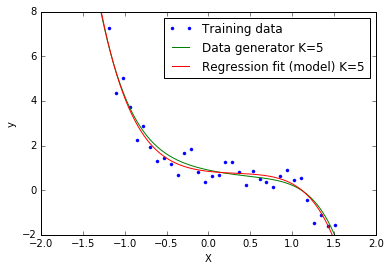

In [104]:
# 5.2.3
# Parameters
Kd = 5  # no of terms for data generator
Km = 5  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe =  np.mat(linspace(-2,2,1000)).T # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5          # noise parameters

# Generate dataset (with noise)
X = np.mat(linspace(-2,2,N)).T
Xd = np.power(X, range(1,Kd+1))
eps = np.mat(eps_std*np.random.randn(N) + eps_mean).T
w = np.mat( -np.power(-.9, range(1,Kd+2)) ).T
y = w[0,0] + Xd * w[1:,:] + eps 

# True data generator (assuming no noise)
Xde = np.power(Xe, range(1,Kd+1))
y_true = w[0,0] + Xde * w[1:,:]


# Fit ordinary least squares regression model
Xm = np.power(X, range(1,Km+1))
model = lm.LinearRegression()
model = model.fit(Xm,y)

# Predict values
Xme = np.power(Xe, range(1,Km+1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = figure()
f.hold(True)
plot(X.A,y.A,'.')
plot(Xe.A,y_true.A,'-')
plot(Xe.A,y_est,'-')
xlabel('X'); ylabel('y'); ylim(-2,8)
legend(['Training data', 'Data generator K={0}'.format(Kd), 'Regression fit (model) K={0}'.format(Km)])

show()

#### How well is the model able to fit the data?
The model fits the data relatively well, but the local min and max of the curve could both be more smoothened towards the datapoints which almost fit a straight line between $x=[-0.5;1.0]$.

As the order of the associated polynomial is increased the model fits the data more and mroe accurately. When ``Km``$=5$, the model almost completely fit the green line.

When the polynomial gets even higher the model clearly overfits.

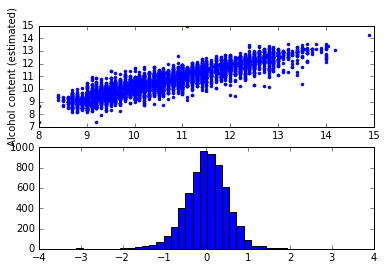

In [111]:
# 5.2.4
# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = range(0,alcohol_idx) + range(alcohol_idx+1,len(attributeNames))
X_rows = range(0,len(y))
X = X[ix_(X_rows,X_cols)]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display scatter plot
figure()
subplot(2,1,1)
plot(y.A, y_est, '.')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)');
subplot(2,1,2)
hist(residual,40)

show()


#### Explain why it is true the alcohol content can be predicted with an accuracy of approximately $\pm 1$ percentage point.
Since approximately all data in the histogram is fitted within the range $[-1;1]$ the alcohol can be predicted with the same accuracy.

#### Show from the estimated parameters of the linear regression model that wines with higher alcohol content in general have lower density

Looking at the upper plot, following the tendency line of the data, one can see that the density of the datapoints decreases as the alcohol content increases.

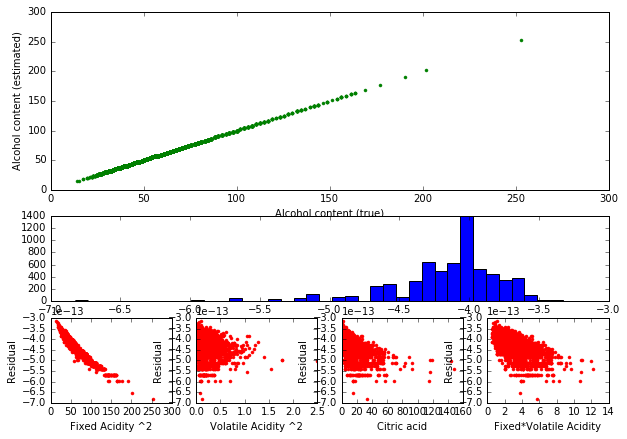

In [155]:
# 5.2.5
# Split dataset into features and target vector
alcohol_idx = attributeNames.index('Alcohol')
y = X[:,alcohol_idx]

X_cols = range(0,alcohol_idx) + range(alcohol_idx+1,len(attributeNames))
X_rows = range(0,len(y))
X = X[ix_(X_rows,X_cols)]

# Additional nonlinear attributes
fa_idx = attributeNames.index('Fixed acidity')
va_idx = attributeNames.index('Volatile acidity')
ca_idx = attributeNames.index('Citric acid')
Xfa2 = np.power(X[:,fa_idx],2)
Xva2 = np.power(X[:,va_idx],2)
Xca2 = np.power(X[:,ca_idx],2)
Xfavaca = np.multiply(X[:,fa_idx],X[:,va_idx],X[:,ca_idx])
X = np.bmat('X, Xfa2, Xva2, Xca2, Xfavaca')

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X,y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est-y

# Display plots
figure(figsize=(10,7))

# Four rows, placed at 1,1
subplot(2,1,1)
plot(y.A, y_est, '.g')
xlabel('Alcohol content (true)'); ylabel('Alcohol content (estimated)')

subplot(4,1,3)
hist(residual,40)

subplot(4,4,13)
plot(Xfa2.A, residual.A, '.r')
xlabel('Fixed Acidity ^2'); ylabel('Residual')

subplot(4,4,14)
plot(Xva2.A, residual.A, '.r')
xlabel('Volatile Acidity ^2'); ylabel('Residual')

subplot(4,4,15)
plot(Xca2.A, residual.A, '.r')
xlabel('Citric acid'); ylabel('Residual')

subplot(4,4,16)
plot(Xfavaca.A, residual.A, '.r')
xlabel('Fixed*Volatile Acidity'); ylabel('Residual')


show()

#### The script introduces more variables in the regression by combining or transforming existing variables. Explain how that is done in the script and which transformations are used. 

Fixed acidity and volatile acidity is added. Ordinary least squares model is used.


Probability of given sample being a white wine: 0.9989

Overall misclassification rate: 1.548


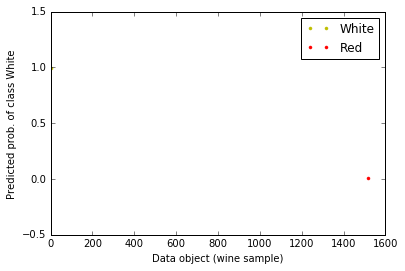

In [161]:
# 5.2.6
# Fit logistic regression model
model = lm.logistic.LogisticRegression()
model = model.fit(X, y.A.ravel())

# Classify wine as White/Red (0/1) and assess probabilities
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0] 

# Define a new data object (new type of wine), as in exercise 5.1.7
x = (np.array([6.9, 1.09, .06, 2.1, .0061, 12, 31, .99, 3.5, .44, 12])).reshape(1,-1)
# Evaluate athe probability of x being a white wine (class=0) 
x_class = model.predict_proba(x)[0,0]

# Evaluate classifier's misclassification rate over entire training data
misclass_rate = sum(np.abs(np.mat(y_est).T - y)) / float(len(y_est))

# Display classification results
print('\nProbability of given sample being a white wine: {0:.4f}'.format(x_class))
print('\nOverall misclassification rate: {0:.3f}'.format(misclass_rate))

f = figure(); f.hold(True)
class0_ids = nonzero(y==0)[0].tolist()[0]
plot(class0_ids, y_est_white_prob[class0_ids], '.y')
class1_ids = nonzero(y==1)[0].tolist()[0]
plot(class1_ids, y_est_white_prob[class1_ids], '.r')
xlabel('Data object (wine sample)'); ylabel('Predicted prob. of class White');
legend(['White', 'Red'])
ylim(-0.5,1.5)

show()